# 1. 데이터 불러오기

In [12]:
df <- read.csv('classification_data.csv')

In [13]:
train_by_python <- read.csv('train_by_python.csv')
test_by_python <- read.csv('test_by_python.csv')

In [14]:
head(train_by_python,1)

,X,gid,Y,총인구,유소년인구,승용차_14시_19시,혼잡빈도강도합,혼잡시간강도합,학원,체육시설,횡단보도,아파트,삼거리,사거리,평균유동인구,신호등,횡단보도길이,주정차단속
,<int>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,1965,다사630036,1,0,0,2741.55,213.05,330.27,0,1,2,0,0,0,3,4,0.6839698,1


In [15]:
head(df,1)

,X,gid,Y,총인구,유소년인구,승용차_14시_19시,혼잡빈도강도합,혼잡시간강도합,학원,체육시설,횡단보도,아파트,삼거리,사거리,평균유동인구,신호등,횡단보도길이,주정차단속
,<int>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,0,다사552088,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# 2. 데이터 정제

#### 2-1.변수 제거: X 

In [16]:
df <- df[,-c(1)] 
train_by_python <- train_by_python[,-c(1)]
test_by_python <- test_by_python[,-c(1)]

#### 2-2. 데이터 정규화

In [17]:
df[,c(3,4,5,6,7,8,9,10,11,14,15,16,17)] <- sapply(df[,c(3,4,5,6,7,8,9,10,11,14,15,16,17)],function(x) {(x-min(x))/(max(x)-min(x))})

#### 2-3. Y값 이항 처리

In [18]:
df <- transform(df, Y = ifelse(Y == 0, 0, 1)) 

#### 2-4.factor형 변환

In [19]:
df$삼거리 <- as.factor(df$삼거리)
df$사거리 <- as.factor(df$사거리)

In [20]:
summary(df)

         gid             Y              총인구           유소년인구     
 다사552088:   1   Min.   :0.0000   Min.   :0.000000   Min.   :0.00000  
 다사552089:   1   1st Qu.:0.0000   1st Qu.:0.000000   1st Qu.:0.00000  
 다사553090:   1   Median :1.0000   Median :0.003383   Median :0.00000  
 다사558088:   1   Mean   :0.7345   Mean   :0.050555   Mean   :0.03574  
 다사558090:   1   3rd Qu.:1.0000   3rd Qu.:0.067303   3rd Qu.:0.01896  
 다사559088:   1   Max.   :1.0000   Max.   :1.000000   Max.   :1.00000  
 (Other)   :2122                                                        
 승용차_14시_19시   혼잡빈도강도합     혼잡시간강도합          학원        
 Min.   :0.000000   Min.   :0.000000   Min.   :0.000000   Min.   :0.00000  
 1st Qu.:0.003092   1st Qu.:0.001185   1st Qu.:0.004718   1st Qu.:0.00000  
 Median :0.035208   Median :0.055558   Median :0.061460   Median :0.00000  
 Mean   :0.085198   Mean   :0.106327   Mean   :0.117022   Mean   :0.01167  
 3rd Qu.:0.116577   3rd Qu.:0.149303   3rd Qu.:0.174792   3rd Qu.:0.00000  
 

# 3. 상관분석
회귀분석시 독립변수들간에 상관관계가 높으면 다중공선성 문제 발생하여 독립변수간 상관관계를 살펴본다.

#### 3-1. 상관계수: 연속형 독립변수에 한해서 진행

In [21]:
head(df,1)

,gid,Y,총인구,유소년인구,승용차_14시_19시,혼잡빈도강도합,혼잡시간강도합,학원,체육시설,횡단보도,아파트,삼거리,사거리,평균유동인구,신호등,횡단보도길이,주정차단속
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,다사552088,0,0,0,0,0,0,0,0,0,0,0,0,0.008264463,0,0,0


In [22]:
df_x <- df[,-c(1,2,12,13)]

Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus



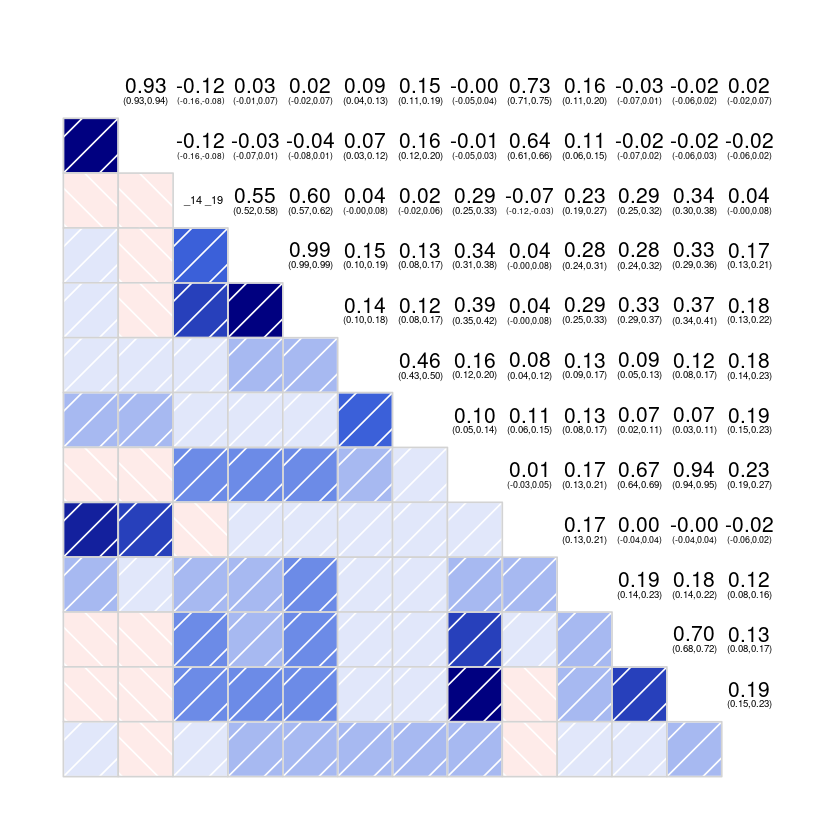

In [23]:
library(corrgram)
corrgram(df_x,upper.panel=panel.conf)

- 총인구, 유소년, 아파트 / 승용차, 혼잡빈도강도합, 혼잡시간강도합  / 횡단보도, 신호등, 횡단보도 길이: 세 변수 간 선형성이 있는 걸로 판단된다. 

#### 3-2.상관분석

H0: 두 변수 간 상관관계가 없다.

H1: 두 변수 간 상관관계가 있다.

In [24]:
cor.test(df_x$총인구,df_x$유소년인구)


	Pearson's product-moment correlation

data:  df_x$총인구 and df_x$유소년인구
t = 120.15, df = 2126, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9279335 0.9388597
sample estimates:
      cor 
0.9336133 


In [25]:
cor.test(df_x$총인구,df_x$아파트)


	Pearson's product-moment correlation

data:  df_x$총인구 and df_x$아파트
t = 48.642, df = 2126, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7050062 0.7452655
sample estimates:
      cor 
0.7257566 


In [26]:
cor.test(df_x$유소년인구,df_x$아파트)


	Pearson's product-moment correlation

data:  df_x$유소년인구 and df_x$아파트
t = 38.439, df = 2126, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6145600 0.6647357
sample estimates:
      cor 
0.6403305 


In [27]:
cor.test(df_x$승용차_14시_19시,df_x$혼잡빈도강도합)


	Pearson's product-moment correlation

data:  df_x$승용차_14시_19시 and df_x$혼잡빈도강도합
t = 30.296, df = 2126, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5187378 0.5781281
sample estimates:
      cor 
0.5491259 


In [28]:
cor.test(df_x$승용차_14시_19시,df_x$혼잡시간강도합)


	Pearson's product-moment correlation

data:  df_x$승용차_14시_19시 and df_x$혼잡시간강도합
t = 34.314, df = 2126, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5689616 0.6236897
sample estimates:
      cor 
0.5970198 


In [29]:
cor.test(df_x$혼잡빈도강도합,df_x$혼잡시간강도합)


	Pearson's product-moment correlation

data:  df_x$혼잡빈도강도합 and df_x$혼잡시간강도합
t = 280.64, df = 2126, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9856050 0.9878426
sample estimates:
      cor 
0.9867707 


In [30]:
cor.test(df_x$횡단보도,df_x$신호등)


	Pearson's product-moment correlation

data:  df_x$횡단보도 and df_x$신호등
t = 41.178, df = 2126, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6417761 0.6890912
sample estimates:
      cor 
0.6661032 


In [31]:
cor.test(df_x$횡단보도,df_x$횡단보도길이)


	Pearson's product-moment correlation

data:  df_x$횡단보도 and df_x$횡단보도길이
t = 130.05, df = 2126, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9375748 0.9470794
sample estimates:
      cor 
0.9425174 


In [32]:
cor.test(df_x$신호등,df_x$횡단보도길이)


	Pearson's product-moment correlation

data:  df_x$신호등 and df_x$횡단보도길이
t = 45.264, df = 2126, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6782391 0.7215549
sample estimates:
      cor 
0.7005417 


- 상관분석 결과, 선형성이 있어 보이는 변수 간 상관관계가 통계적으로 유의므로 다중공선성을 제거해야 한다.

# 4. 다중공선성 제거
상관계수가 가장 높은 변수를 제거해야 하므로 VIF가 10이상인 설명변수들 중에서 VIF가 가장 큰 변수를 제거할 것이다. 그 후 나머지 변수들에 대해 다시 VIF 계산을 하여 VIF가 10이상인 변수를 모두 제거하는 방식을 취한다. 


In [33]:
df_x <- df[,-c(1,12,13)]

In [34]:
library(car)
vif(lm(Y ~., df_x))

Loading required package: carData



총인구       유소년인구 승용차_14시_19시   혼잡빈도강도합 
       10.738111         8.593643         1.862003        45.820086 
  혼잡시간강도합             학원         체육시설         횡단보도 
       51.422698         1.318873         1.331080         9.576397 
          아파트     평균유동인구           신호등     횡단보도길이 
        2.192470         1.172762         2.024173        10.356115 
      주정차단속 
        1.135949

In [35]:
#head(df_x,1)

In [36]:
df_xx <- df_x[,-c(6)]  # 혼잡시간강도합 제거
vif(lm(Y ~., df_xx))

총인구       유소년인구 승용차_14시_19시   혼잡빈도강도합 
       10.644439         8.517965         1.610998         1.661688 
            학원         체육시설         횡단보도           아파트 
        1.318491         1.331068         9.576266         2.192467 
    평균유동인구           신호등     횡단보도길이       주정차단속 
        1.168317         1.995531        10.316144         1.134752

In [37]:
#head(df_xx,1)

In [38]:
df_xxx <- df_xx[,-c(2)]  # 총인구 제거
vif(lm(Y ~., df_xxx))

유소년인구 승용차_14시_19시   혼잡빈도강도합             학원 
        1.744069         1.591844         1.619521         1.318487 
        체육시설         횡단보도           아파트     평균유동인구 
        1.328753         9.556110         1.742551         1.157337 
          신호등     횡단보도길이       주정차단속 
        1.992407        10.285266         1.120046

In [39]:
head(df_xxx,1)

,Y,유소년인구,승용차_14시_19시,혼잡빈도강도합,학원,체육시설,횡단보도,아파트,평균유동인구,신호등,횡단보도길이,주정차단속
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,0.008264463,0,0,0


In [40]:
df_xxxx <- df_xxx[,-c(11)]  # 횡단보도길이 제거
vif(lm(Y ~., df_xxxx))

유소년인구 승용차_14시_19시   혼잡빈도강도합             학원 
        1.743436         1.532092         1.600898         1.316253 
        체육시설         횡단보도           아파트     평균유동인구 
        1.328322         1.962261         1.742164         1.156724 
          신호등       주정차단속 
        1.842732         1.118318

- 혼잡시간강도합, 총인구, 횡단보도길이 세 변수를 제거함으로써 다중공선성 문제가 해결되었다.

# 5. 데이터 분할

### 1) 분할한 데이터 불러오기

In [41]:
head(df,1)

,gid,Y,총인구,유소년인구,승용차_14시_19시,혼잡빈도강도합,혼잡시간강도합,학원,체육시설,횡단보도,아파트,삼거리,사거리,평균유동인구,신호등,횡단보도길이,주정차단속
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,다사552088,0,0,0,0,0,0,0,0,0,0,0,0,0.008264463,0,0,0


In [42]:
df = df[,-c(3,7,16)]  # VIF가 10이상인 변수들 삭제
train_by_python = train_by_python[,-c(3,7,16)]  # VIF가 10이상인 변수들 삭제
test_by_python = test_by_python[,-c(3,7,16)]  # VIF가 10이상인 변수들 삭제

In [43]:
df$Y <- as.factor(df$Y)  # factor형 변환

In [44]:
library(caret)

set.seed(1000)
idx <- createDataPartition(y = df$Y, p = 0.8,list = F)

train_Y <- df[idx,]
test_Y <- df[-idx,]

Loading required package: lattice


Attaching package: ‘lattice’


The following object is masked from ‘package:corrgram’:

    panel.fill


Loading required package: ggplot2



In [45]:
#head(train_Y,1)

In [46]:
#head(train_by_python,1)

In [47]:
train_Y <- train_by_python
test_Y <- test_by_python

# 6. 로지스틱 회귀분석

In [48]:
logistic_Y <- glm(Y~.,data=train_Y[,-1],family="binomial")
summary(logistic_Y)


Call:
glm(formula = Y ~ ., family = "binomial", data = train_Y[, -1])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9282  -1.1399   0.4297   0.8451   1.2444  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -8.880e-02  8.620e-02  -1.030 0.302927    
유소년인구       -2.406e-03  2.918e-03  -0.824 0.409662    
승용차_14시_19시  1.332e-05  6.330e-06   2.105 0.035316 *  
혼잡빈도강도합    1.828e-03  3.064e-04   5.967 2.42e-09 ***
학원              4.258e-02  3.634e-02   1.172 0.241245    
체육시설         -9.250e-02  3.302e-01  -0.280 0.779374    
횡단보도         -3.705e-02  8.316e-02  -0.446 0.655957    
아파트            4.110e-01  1.066e-01   3.855 0.000116 ***
삼거리            5.897e-02  2.278e-01   0.259 0.795728    
사거리            6.222e-01  2.706e-01   2.300 0.021463 *  
평균유동인구      6.528e-02  1.307e-02   4.993 5.95e-07 ***
신호등           -4.909e-04  5.850e-02  -0.008 0.993304    
주정차단속        8.492e-03  4.595e-03   1.848 0.064592 .  
---
Signif

- 로지스틱 회귀분석 결과 독립변수가 유의수준 0.05하에서 유의하지 않은 것이 존재한다. 


- 따라서, 단계적 선택법을 통해 의미있는 독립변수를 선택하고자 한다.

# 7. 단계적 선택법

In [49]:
step.logistic_Y <- step(glm(Y~.,data=train_Y[,-1],family="binomial"),
                      scope=list(lower=~1,upper=~유소년인구+승용차_14시_19시+혼잡빈도강도합+학원+체육시설+횡단보도+아파트+삼거리+사거리+평균유동인구+신호등+주정차단속),direction="both")

Start:  AIC=1670.33
Y ~ 유소년인구 + 승용차_14시_19시 + 혼잡빈도강도합 + 
    학원 + 체육시설 + 횡단보도 + 아파트 + 삼거리 + 
    사거리 + 평균유동인구 + 신호등 + 주정차단속

                   Df Deviance    AIC
- 신호등            1   1644.3 1668.3
- 삼거리            1   1644.4 1668.4
- 체육시설          1   1644.4 1668.4
- 횡단보도          1   1644.5 1668.5
- 유소년인구        1   1645.0 1669.0
- 학원              1   1646.1 1670.1
<none>                  1644.3 1670.3
- 승용차_14시_19시  1   1649.0 1673.0
- 사거리            1   1650.1 1674.1
- 주정차단속        1   1651.2 1675.2
- 아파트            1   1665.2 1689.2
- 평균유동인구      1   1678.5 1702.5
- 혼잡빈도강도합    1   1692.5 1716.5

Step:  AIC=1668.33
Y ~ 유소년인구 + 승용차_14시_19시 + 혼잡빈도강도합 + 
    학원 + 체육시설 + 횡단보도 + 아파트 + 삼거리 + 
    사거리 + 평균유동인구 + 주정차단속

                   Df Deviance    AIC
- 삼거리            1   1644.4 1666.4
- 체육시설          1   1644.4 1666.4
- 횡단보도          1   1644.7 1666.7
- 유소년인구        1   1645.0 1667.0
- 학원              1   1646.1 1668.1
<none>                  1644.3 1668.3
+ 신호등            1   1644.

- 일곱번째 단계까지의 결과를 최종모형으로 사용한다.

In [50]:
step.logistic_Y <- glm(Y ~ 승용차_14시_19시 + 혼잡빈도강도합 + 아파트 + 
    사거리 + 평균유동인구 + 주정차단속,data=train_Y[,-1],family="binomial")
summary(step.logistic_Y)


Call:
glm(formula = Y ~ 승용차_14시_19시 + 혼잡빈도강도합 + 
    아파트 + 사거리 + 평균유동인구 + 주정차단속, 
    family = "binomial", data = train_Y[, -1])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9183  -1.1372   0.4333   0.8441   1.2181  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -9.527e-02  8.495e-02  -1.121   0.2621    
승용차_14시_19시  1.378e-05  5.860e-06   2.351   0.0187 *  
혼잡빈도강도합    1.815e-03  2.965e-04   6.123 9.18e-10 ***
아파트            3.536e-01  7.194e-02   4.914 8.90e-07 ***
사거리            6.025e-01  2.687e-01   2.242   0.0249 *  
평균유동인구      6.535e-02  1.302e-02   5.020 5.17e-07 ***
주정차단속        8.514e-03  4.514e-03   1.886   0.0593 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1970.2  on 1701  degrees of freedom
Residual deviance: 1647.0  on 1695  degrees of freedom
AIC: 1661

Number of Fisher Scoring iterations: 7


### 분석결과
- 다중공선성 문제로 총인구, 혼잡시간강도, 횡단보도길이 변수가 제외되었다.
- 단계적 변수선택법을 통해 승용차_14시_19시, 혼잡빈도강도합, 아파트, 사거리, 평균유동인구, 주정차단속 - 6개의 변수가 선택되었다.
- 선택된 6개의 변수들을 이용해 Python에서 로지스틱 회귀분석 및 어린이교통사고 위험 지수 개발을 진행한다.